In [104]:
import numpy as np

# Training data
#X_positive = np.array([[-2, 9], [3, 14], [4, 4], [8, -6], [12, -4], [13, 11]])
#X_negative = np.array([[-11, 8], [-8, -3], [-6, 4], [-2, -10], [2, -15], [6, -14]])
X_positive = np.array([[-2, 0]])
X_negative = np.array([[0, 0], [0, -1]])

# Combine the data
X = np.vstack((X_negative, X_positive))
y = np.array([-1] * len(X_negative) + [1] * len(X_positive))  # Labels

# Problem size
N, d = X.shape

# QP setup
Q = np.zeros((d + 1, d + 1))  # Quadratic matrix for [b, w1, w2]
Q[1:, 1:] = np.eye(d)  # Only weights (w1, w2) have quadratic terms
p = np.zeros(d + 1)  # Linear term is zero
A = np.hstack((y[:, None], y[:, None] * X))  # Combine bias and weights
c = np.ones(N)  # Right-hand side of constraints

# Gradient descent parameters
alpha = 0.003  # Learning rate
num_iterations = 10000
epsilon = 1e-6  # Tolerance for convergence

# Initialize variables
u = np.zeros(1 + d)  # [b, w1, w2]

# Gradient descent to solve the QP
for iteration in range(num_iterations):
    gradient = Q @ u  # Gradient of the quadratic term
    for i in range(N):
        constraint_violation = np.dot(A[i], u) - c[i]
        if constraint_violation < 0:
            gradient += -A[i]  # Add the violated constraint to the gradient
    u -= alpha * gradient  # Update u
    
    # Check for convergence
    if np.linalg.norm(gradient) < epsilon:
        break

# Extract results
optimal_b = u[0]
optimal_w = u[1:]

optimal_b, optimal_w


(np.float64(-1.0020000000000007), array([-0.99849775,  0.0012218 ]))

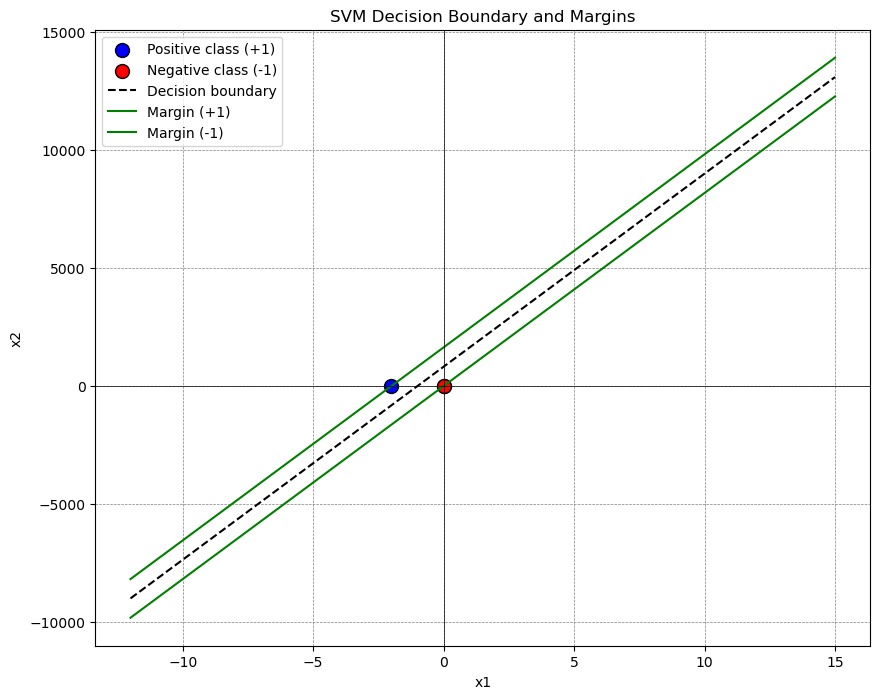

In [105]:
import matplotlib.pyplot as plt
#(array([-1.00000000e+00, -1.92319848e-16]), np.float64(-1.0000000000000002))
#optimal_w[0]= -1.00000000e+00
#optimal_w[1]= -1.92319848e-16
#optimal_b = -1.0000000000000002
# Plot settings
plt.figure(figsize=(10, 8))

# Plot the points
plt.scatter(X_positive[:, 0], X_positive[:, 1], color='blue', label='Positive class (+1)', s=100, edgecolor='k')
plt.scatter(X_negative[:, 0], X_negative[:, 1], color='red', label='Negative class (-1)', s=100, edgecolor='k')

# Decision boundary
#x_vals = np.linspace(-3, 1, 100)
x_vals = np.linspace(-12, 15, 300)
decision_boundary = -(optimal_w[0] * x_vals + optimal_b) / optimal_w[1]
#decision_boundary = -(optimal_w[0] / optimal_w[1]) * x_vals - optimal_b / optimal_w[1]
#decision_boundary = -(optimal_w[0] * x_vals + optimal_b) / optimal_w[1]
margin_up = decision_boundary + 1 / optimal_w[1]
margin_down = decision_boundary - 1 / optimal_w[1]

plt.plot(x_vals, decision_boundary, 'k--', label='Decision boundary')
plt.plot(x_vals, margin_up, 'g-', label='Margin (+1)')
plt.plot(x_vals, margin_down, 'g-', label='Margin (-1)')

# Additional plot settings
plt.title("SVM Decision Boundary and Margins")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()
